### Introduction of Walmart Analysis

#### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

The purpose of this analysis is to provide the Walmart management team with a comprehensive understanding of customer purchase behavior, particularly in relation to gender. Our focus will be on examining whether there is a significant difference in spending patterns between male and female customers, especially during peak shopping events such as Black Friday.This analysis will delve into the nuances of consumer behavior, offering data-driven insights that will empower Walmart to make more informed business decisions.

The findings will not only shed light on gender-based spending trends but also identify other critical factors influencing purchase amounts, ultimately guiding Walmart in optimizing its sales strategies and enhancing customer satisfaction.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [4]:
df=pd.read_csv('/Users/karan/Downloads/walmart_data.txt')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [9]:
df.shape

(550068, 10)

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Upon examining the dataset, we confirmed that it contains no missing values.

In [12]:
df['Gender'].value_counts(normalize=True)*100

Gender
M    75.310507
F    24.689493
Name: proportion, dtype: float64

In [88]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

There approximately 5,891 unique user IDs, indicating a diverse and extensive customer base. This diversity in user IDs provides a robust foundation for analyzing customer behavior and trends.

In [14]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


However, it is worth noting that while the average spending among men is higher, the maximum spending observed among women exceeds that of men. 

<Axes: xlabel='Gender', ylabel='Purchase'>

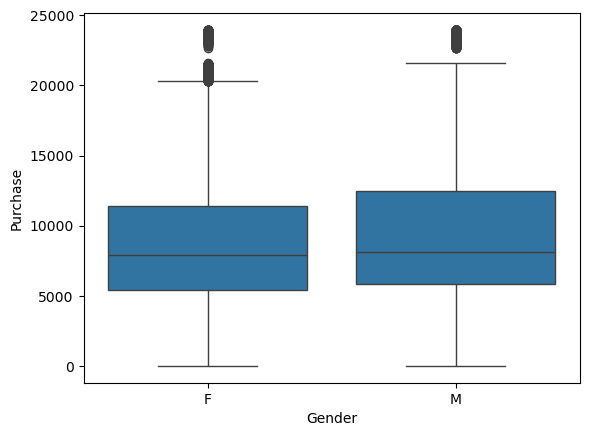

In [15]:
sns.boxplot(x='Gender',y='Purchase',data=df)

In [16]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Our preliminary analysis suggests that men, on average, tend to spend more than women.This finding will be further examined and validated in our subsequent analysis.

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

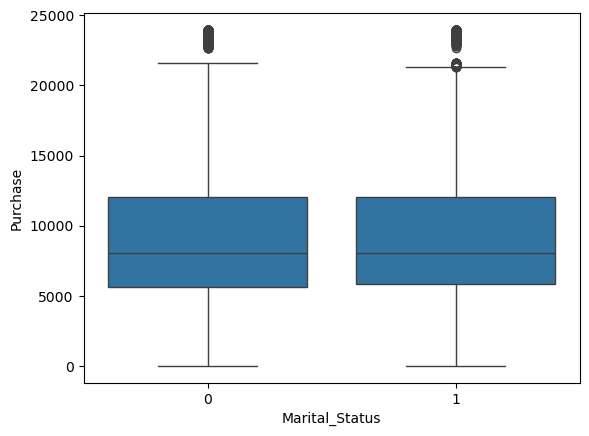

In [17]:
sns.boxplot(x="Marital_Status",y='Purchase',data=df)

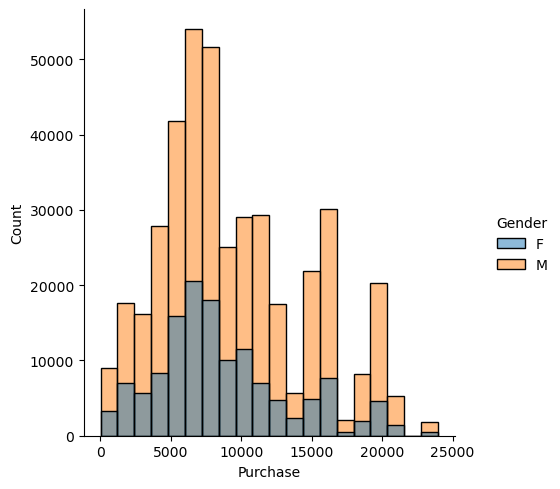

In [18]:
sns.displot(x='Purchase',hue='Gender',data=df,bins=20)

In [20]:
n=500
itr=1000
male_sample_mean=[df[df['Gender']=="M"].sample(n,replace=True)['Purchase'].mean() for i in range (itr)]

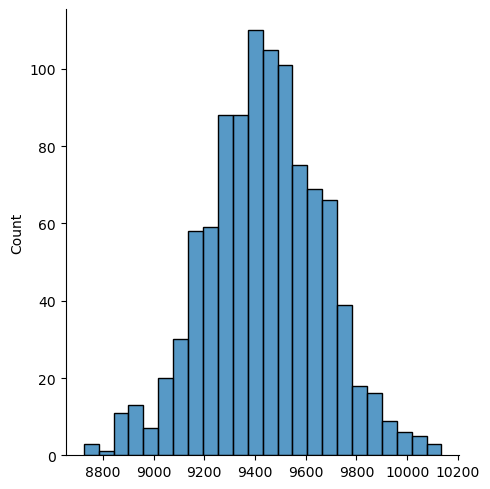

In [21]:
sns.displot(male_sample_mean)

In [22]:
n=500
itr=1000
female_sample_mean=[df[df['Gender']=="F"].sample(n,replace=True)['Purchase'].mean() for i in range (itr)]

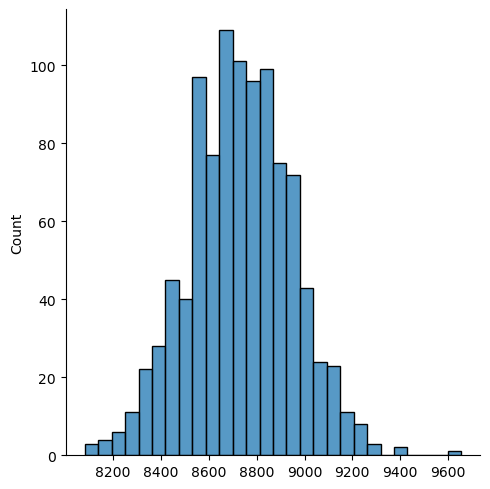

In [23]:
sns.displot(female_sample_mean)

In [24]:
from scipy.stats import norm
#with 95% confidence interval

In [25]:
z_score=np.round(norm.ppf(0.975),2)

In [26]:
male_upper_limit=np.mean(male_sample_mean)+z_score*(np.std(male_sample_mean))

In [27]:
male_lower_limit=np.mean(male_sample_mean)-z_score*(np.std(male_sample_mean))

In [28]:
male_lower_limit,male_upper_limit

(8990.943660886189, 9883.056987113809)

In [29]:
female_upper_limit=np.mean(female_sample_mean)+z_score*(np.std(female_sample_mean))
female_lower_limit=np.mean(female_sample_mean)-z_score*(np.std(female_sample_mean))

In [30]:
female_lower_limit,female_upper_limit

(8312.317343385477, 9152.482724614523)

In [31]:
male_limits= np.percentile(male_sample_mean, [2.5, 97.5])
male_limits

array([8953.90235, 9892.72665])

In [32]:
female_sample_mean=np.percentile(female_sample_mean,[2.5,97.5])
female_sample_mean

array([8307.49815, 9147.6053 ])

H0(Null) Hypothesies: Gender does not have effect on purchase.

H1(Alternate) Hypothesies: Gender does  have effect on purchase.

In [113]:
import scipy.stats as stats
contingency_table = pd.crosstab(df['Gender'], df['Purchase'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [121]:
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p< 0.05:
    print("Gender does have effect on the purchsae.")
else:
    print("Gender does not have effect on the purchsae.")

Chi2 Statistic: 23742.23880904363
p-value: 4.441402146544842e-161
Gender does have effect on the purchsae.


In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [38]:
married=df[df['Marital_Status']==1]['Purchase'].count()

In [39]:
married

225337

In [40]:
unmarried=df[df['Marital_Status']==0]['Purchase'].count()

In [41]:
unmarried

324731

In [42]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [43]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [44]:
df['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

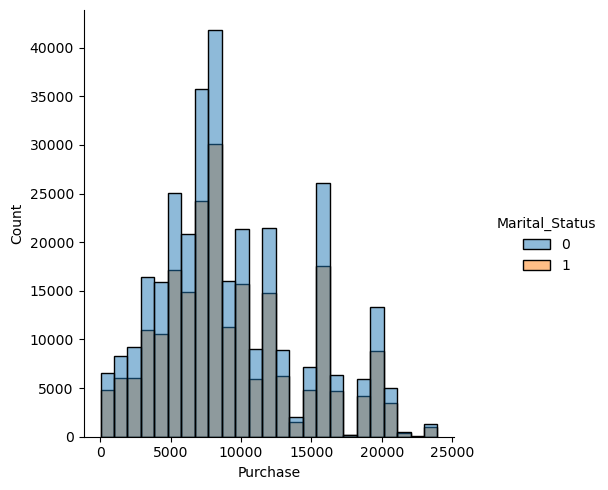

In [45]:
sns.displot(x='Purchase',hue='Marital_Status',data=df,bins=25)

In [46]:
n=500
itr=1000
unmarried_sample_mean=[df[df['Marital_Status']==0].sample(n,replace=True)['Purchase'].mean() for i in range (itr)]

In [47]:
n=500
itr=1000
married_sample_mean=[df[df['Marital_Status']==1].sample(n,replace=True)['Purchase'].mean() for i in range (itr)]

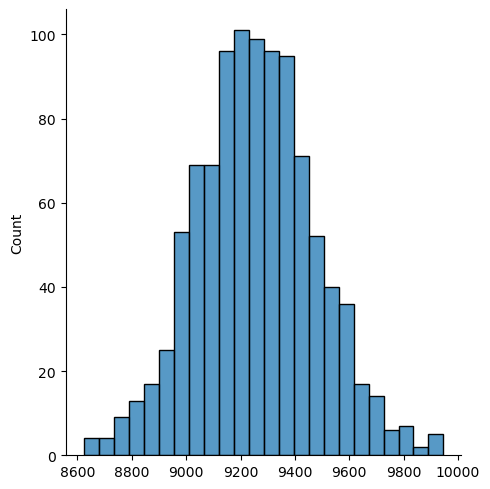

In [48]:
sns.displot(unmarried_sample_mean)

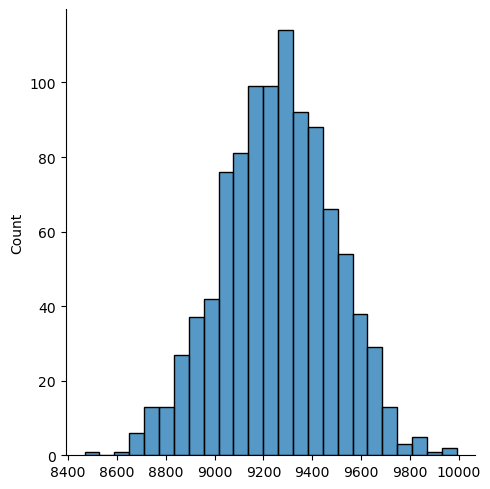

In [49]:
sns.displot(married_sample_mean)

In [50]:
married_limits= np.percentile(married_sample_mean, [2.5, 97.5])
married_limits

array([8803.8141, 9685.7824])

In [51]:
unmarried_limits= np.percentile(unmarried_sample_mean, [2.5, 97.5])
unmarried_limits

array([8829.54265, 9695.16385])

In [125]:
contingency_table = pd.crosstab(df['Marital_Status'], df['Purchase'])

In [59]:
import scipy.stats as stats

In [127]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [129]:
print("Chi2 Statistic:", chi2)
print("p-value:", p)

if p< 0.05:
    print("Marital_Status does have effect on the purchsae.")
else:
    print("Marital_Status does not have effect on the purchsae.")

Chi2 Statistic: 18358.59467374225
p-value: 0.0908971783251125
Marital_Status does not have effect on the purchsae.


In [63]:
df['Age'].nunique()

7

In [64]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [65]:
df['Age'].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

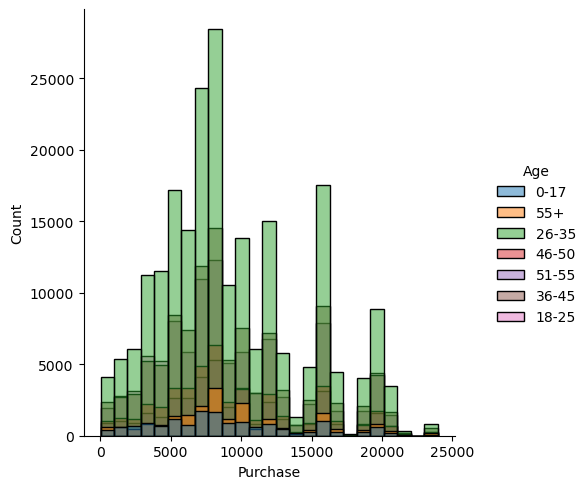

In [66]:
sns.displot(x=df['Purchase'],hue=df['Age'],data=df,bins=25)

In [67]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Age'], df['Purchase'])
chi2=chi2_contingency(contingency_table)
chi2

Chi2ContingencyResult(statistic=118078.58708563307, pvalue=6.49987300707075e-87, dof=108624, expected_freq=array([[ 2.77293353,  2.91020747,  2.6082048 , ...,  0.05490957,
         0.10981915,  0.08236436],
       [18.29893759, 19.20482559, 17.21187199, ...,  0.3623552 ,
         0.7247104 ,  0.5435328 ],
       [40.31917327, 42.31517194, 37.92397485, ...,  0.79839947,
         1.59679894,  1.19759921],
       ...,
       [ 8.39132798,  8.80674026,  7.89283325, ...,  0.16616491,
         0.33232982,  0.24924737],
       [ 7.06930961,  7.41927544,  6.64935063, ...,  0.13998633,
         0.27997266,  0.20997949],
       [ 3.94842819,  4.14389494,  3.7138681 , ...,  0.0781867 ,
         0.15637339,  0.11728005]]))

Age does have effect on the Purchase

### Final Insights

#### Impact of Gender on Purchase
#### Key Insight:
-Our analysis indicates a clear and significant impact of gender on purchase behavior.When analyzing purchase patterns by gender, we found distinct differences in average spending, product preferences, or frequency of purchases between men and women.

-Gender and Age are crucial factors that should be considered in targeted marketing and product offerings. The distinct preferences and spending behaviors identified in these segments can be leveraged to optimize inventory, tailor promotions, and improve customer satisfaction.

-Contrary to gender, our analysis shows that marital status does not significantly influence purchase behavior. There were no significant differences in average purchase amounts when we segmented customers by marital status.

-This finding suggests that marketing strategies or promotions targeting marital status may not yield substantial differences in outcomes. 

-Gender plays a significant role in influencing purchase behavior. Certain product categories may be more appealing to men or women, leading to differentiated marketing strategies.




### Key insights and recommendations to consider in order to increase sales:high-traffic times.